In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import grape as g


In [22]:
# Load in dataset from csv
df = pd.read_csv('DATA/filtered_dtec.csv', header=None)

colnames = ['doy', 'lat', 'lon', 'dtec']
df.columns = colnames

h = df.head()
print(h)


     doy      lat       lon    dtec
0  181.0  40.3043 -118.5940  0.0236
1  181.0  40.9166 -122.5876 -0.0119
2  181.0  40.0408  -75.9074  0.0586
3  181.0  41.7403 -121.1315 -0.0705
4  181.0  40.4477 -120.3947 -0.0038


In [37]:
# Filter by Longitude (-120 to -60)
df_filt_lon = df[df['lon'] > -120]
df_filt_lon = df_filt_lon[df_filt_lon['lon'] < -60]

print(df.shape)
print(df_filt_lon.shape)

(10939763, 5)
(7058806, 5)


In [44]:
# Filter by dTEC
df_filter_dTEC = df_filt_lon[df_filt_lon['dtec'] > -0.2]
df_filter_dTEC = df_filter_dTEC[df_filter_dTEC['dtec'] < 0.2]

print(df_filter_dTEC.shape)
datapoints = df_filter_dTEC.shape[0]


(6849075, 5)


In [39]:
# Calculate time from DOY in UT
daynum = df_filter_dTEC['doy'][0]
df_filter_dTEC['ut'] = (df_filter_dTEC['doy'] - daynum) * 24

h = df_filter_dTEC.head()
print(h)

     doy      lat       lon    dtec   ut
0  181.0  40.3043 -118.5940  0.0236  0.0
2  181.0  40.0408  -75.9074  0.0586  0.0
5  181.0  40.9056 -109.5143 -0.0614  0.0
6  181.0  40.9449 -109.6708 -0.0063  0.0
7  181.0  41.6272 -118.0213 -0.0042  0.0


In [78]:
# Subsample the dataset
n = int(1e1)
ss_df = df_filter_dTEC[0:datapoints:n]


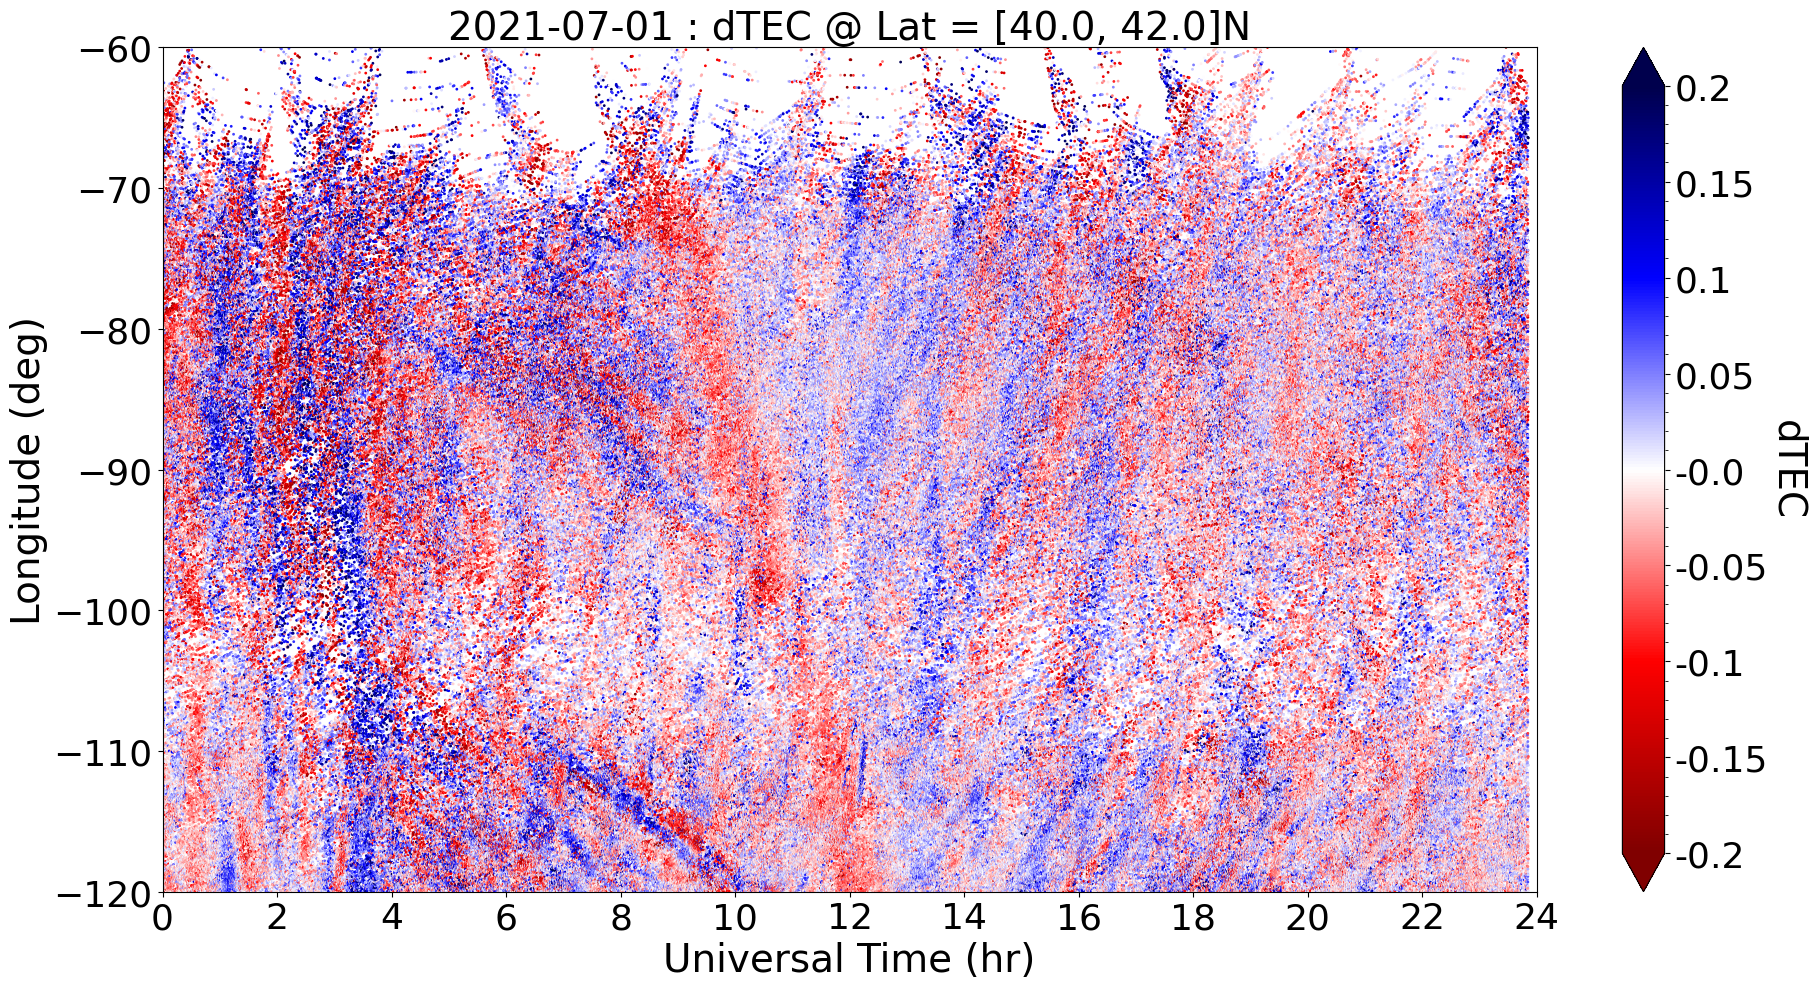

In [84]:
# Plot the data
fig = plt.figure(figsize=(19, 10), layout='tight')
ax1 = fig.add_subplot()

norm = colors.CenteredNorm()
cmap = 'seismic_r'

x = ss_df['ut']
y = ss_df['lon']
c = ss_df['dtec']

scatter = ax1.scatter(x, y, s=1, c=c, norm=norm, cmap=cmap)

fsize = 28
ax1.set_xlabel('Universal Time (hr)', fontsize=fsize)
ax1.set_ylabel('Longitude (deg)', fontsize=fsize)
xticks = np.arange(0,26,2)
ax1.set_xticks(xticks)
ax1.set_xlim(0, 24)
ax1.set_ylim(-120, -60)
ax1.tick_params(axis='x', labelsize=fsize - 2)
ax1.tick_params(axis='y', labelsize=fsize - 2)
# ax1.grid(axis='x', alpha=0.3)
# ax1.grid(axis='y', alpha=1)

cbar = fig.colorbar(scatter, extend='both')
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=fsize - 2)
cbarticks = np.arange(-0.2, 0.25, 0.05)
cbarlabels = [str(round(i,2)) for i in cbarticks]
cbar.set_ticks(cbarticks)
cbar.set_ticklabels(cbarlabels)
cbar.ax.get_yaxis().labelpad = fsize
cbar.ax.set_ylabel('dTEC', fontsize=fsize, rotation=270)

ax1.set_title('2021-07-01 : dTEC @ Lat = [40.0, 42.0]N',
            fontsize=fsize)

plt.show()
